In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import feature_column
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
raw_dataset = pd.read_csv('E:/Tài liệu đại học/Tri tue nhan tao va ung dung/AI Project/dataset/Go_To_College_Dataset.csv')
dataset = raw_dataset.copy()
dataset.tail()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True
999,Academic,B,Male,Interested,Urban,50,2940000,69.1,86.13,True,False


In [4]:
dataset.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [5]:
dataset['type_school'] = dataset['type_school'].map({'Academic':0, 'Vocational':1})
dataset['school_accreditation'] = dataset['school_accreditation'].map({'A': 0,'B': 1})
dataset['gender'] = dataset['gender'].map({'Male': 0,'Female': 1})
dataset['interest'] = dataset['interest'].map({'Very Interested': 0, 'Interested':1,'Uncertain': 2,'Less Interested':3,'Quiet Interested':4, 'Not Interested':5})
dataset['residence'] = dataset['residence'].map({'Urban':0,'Rural': 1})
dataset["parent_was_in_college"] = dataset["parent_was_in_college"].astype(int)
dataset["will_go_to_college"] = dataset["will_go_to_college"].astype(int)
dataset

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,0,3,0,56,6950000,83.0,84.09,0,1
1,0,0,0,3,0,57,4410000,76.8,86.91,0,1
2,0,1,1,0,0,50,6500000,80.6,87.43,0,1
3,1,1,0,0,1,49,6600000,78.2,82.12,1,1
4,0,0,1,0,0,57,5250000,75.1,86.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,0,1,49,7420000,63.6,85.99,1,1
996,0,1,1,3,1,51,7480000,84.3,89.72,1,1
997,1,0,0,3,0,49,5550000,75.2,79.56,0,1
998,0,1,0,2,1,53,5840000,105.8,87.18,1,1


In [6]:
dataset.isnull().sum()/len(dataset)*100

type_school              0.0
school_accreditation     0.0
gender                   0.0
interest                 0.0
residence                0.0
parent_age               0.0
parent_salary            0.0
house_area               0.0
average_grades           0.0
parent_was_in_college    0.0
will_go_to_college       0.0
dtype: float64

In [7]:
col = dataset.columns
col

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'will_go_to_college'],
      dtype='object')

In [8]:
col.shape

(11,)

In [9]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [10]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
type_school,800.0,3.912500e-01,4.883355e-01,0.0,0.0,0.000,1.000000e+00,1.0
school_accreditation,800.0,5.112500e-01,5.001861e-01,0.0,0.0,1.000,1.000000e+00,1.0
gender,800.0,4.875000e-01,5.001564e-01,0.0,0.0,0.000,1.000000e+00,1.0
interest,800.0,1.721250e+00,1.534272e+00,0.0,0.0,2.000,3.000000e+00,5.0
residence,800.0,4.562500e-01,4.983939e-01,0.0,0.0,0.000,1.000000e+00,1.0
parent_age,800.0,5.227750e+01,3.424201e+00,40.0,50.0,52.000,5.400000e+01,64.0
parent_salary,800.0,5.378575e+06,1.386208e+06,1000000.0,4367500.0,5480000.000,6.370000e+06,8930000.0
house_area,800.0,7.472000e+01,1.531728e+01,20.0,65.0,75.600,8.510000e+01,120.0
average_grades,800.0,8.616152e+01,3.385322e+00,75.0,83.9,85.725,8.830750e+01,98.0
parent_was_in_college,800.0,5.175000e-01,5.000063e-01,0.0,0.0,1.000,1.000000e+00,1.0


In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('will_go_to_college')
test_labels = test_features.pop('will_go_to_college')

In [12]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
type_school,3.912500e-01,4.883355e-01
school_accreditation,5.112500e-01,5.001861e-01
gender,4.875000e-01,5.001564e-01
interest,1.721250e+00,1.534272e+00
residence,4.562500e-01,4.983939e-01
parent_age,5.227750e+01,3.424201e+00
parent_salary,5.378575e+06,1.386208e+06
house_area,7.472000e+01,1.531728e+01
average_grades,8.616152e+01,3.385322e+00
parent_was_in_college,5.175000e-01,5.000063e-01


In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [14]:
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[3.9124995e-01 5.1124996e-01 4.8749995e-01 1.7212499e+00 4.5625001e-01
  5.2277493e+01 5.3785740e+06 7.4720009e+01 8.6161522e+01 5.1749992e-01]]


In [15]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[      0.         1.         0.         0.         1.        53.
  5000000.        50.8       84.54       1.  ]]

Normalized: [[-0.8   0.98 -0.98 -1.12  1.09  0.21 -0.27 -1.56 -0.48  0.97]]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 10)                21        
_________________________________________________________________
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,950
Trainable params: 4,929
Non-trainable params: 21
_________________________________________________________________


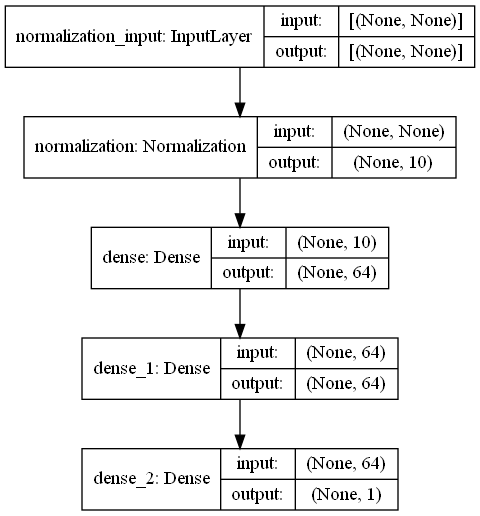

In [16]:
model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)


In [17]:
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 12ms/step - loss: 0.4484 - val_loss: 0.2878
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2815 - val_loss: 0.2484
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2517 - val_loss: 0.2339
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2352 - val_loss: 0.2219
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.2258 - val_loss: 0.2088
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2184 - val_loss: 0.2084
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2114 - val_loss: 0.2033
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2035 - val_loss: 0.1972
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1955 - val_loss: 0.2033
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1938 - val_loss: 0.1941
Epoch 11

In [18]:
def plot_loss(history):
    plt.figure(figsize=(10,10))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

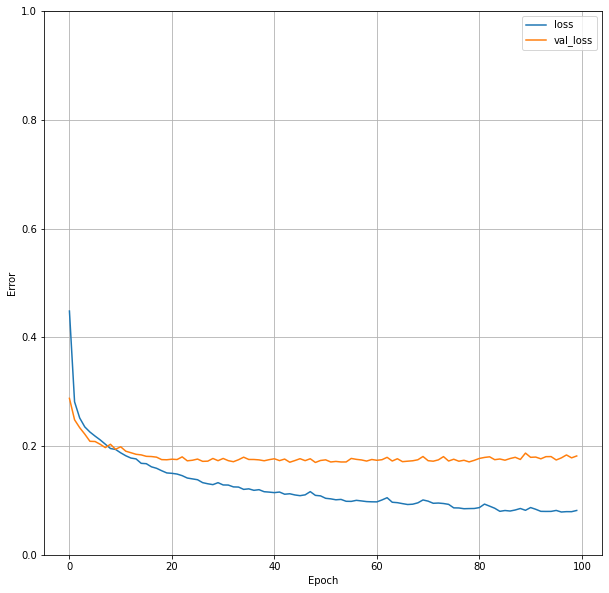

In [19]:
plot_loss(history)

In [20]:
test_predictions = model.predict(test_features).flatten()
for i in range(len(test_predictions)):
    if(test_predictions[i]>0.5):
        test_predictions[i] = 1
    else:
        test_predictions[i] = 0
    

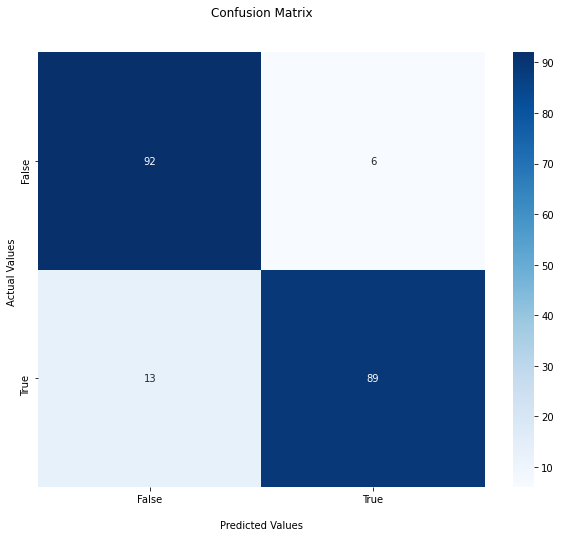

In [21]:
confu = confusion_matrix(test_labels, test_predictions, labels=[0,1])
plt.figure(figsize=(10,8))
ax = sns.heatmap(confu, annot=True, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [22]:
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        98
           1       0.94      0.87      0.90       102

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200

